In [27]:
import pandas as pd
import diff_classifier.aws as aws
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy.ma as ma
%matplotlib inline

In [50]:
def plot_ft_distribution(prefix, bins, labels, feature, folder="01_18_Experiment", show=True):
    
    def cumulative(ls):
        test = [0]*len(ls)
        test[0] = np.round(ls[0], 4)
        for i in range(1, len(ls), 1):
            test[i] = np.round(test[i-1] + ls[i], 4)
        return test
    
    def rearrange(*args):
        counter = 0
        for ls in args:
            counter = counter + 1
            old_size = len(ls)
        new_size = counter

        new_lists = np.zeros((old_size, new_size))
        ncounter = 0
        for ls in args:
            for i in range(0, old_size):
                new_lists[i, ncounter] = ls[i]
            ncounter = ncounter + 1
        return new_lists
    
    def generate_legend(bins, ends=True):
        nbins = len(bins)
        lbins = [0]*(nbins-1)
        for i in range(0, nbins-1, 1):
            if i==0 and ends:
                lbins[i] = '< {}'.format(bins[i+1])
            elif i==nbins-2 and ends:
                lbins[nbins-2] = '> {}'.format(bins[i])
            else:
                lbins[i] = '{} -- {}'.format(bins[i], bins[i+1])
        return lbins

    vids = 15
    to_analyze = []
    puppies = []
    hist = [0]*vids
    for vid in range(0, vids):
                pref = "{}_{}".format(prefix, "%04d" % vid)
                pup = prefix.split('_')[0]
                puppies.append(pup)
                fname = 'features_{}.csv'.format(pref)
                to_analyze.append(fname)

                aws.download_s3('{}/{}/{}'.format(folder, pup, fname), fname)
                features = pd.read_csv(to_analyze[vid])
                bins = bins
                
                mfeatures = ma.masked_invalid(features[feature])
                mmask = mfeatures.mask
                mfeatures = features[feature][~mmask]
                hist[vid] = np.histogram(mfeatures, bins=bins)[0]
    
    cortex = [sum(x) for x in zip(hist[0], hist[1], hist[2], hist[3], hist[4])]
    cortex = cumulative(cortex/sum(cortex))
    hipp = [sum(x) for x in zip(hist[5], hist[6], hist[7], hist[8], hist[9])]
    hipp = cumulative(hipp/sum(hipp))
    thal = [sum(x) for x in zip(hist[10], hist[11], hist[12], hist[13], hist[14])]
    thal = cumulative(thal/sum(thal))
    data = rearrange(cortex, hipp, thal)
    
    plt.figure(figsize=(6, 6))

    N = 3
    width = 0.35
    ind = np.arange(N)
    cmap = matplotlib.cm.get_cmap('viridis')
    ssize = data.shape[0]
    legend = list(reversed(generate_legend(bins)))
    ax = {}
    axes = [0]*ssize
    for num in range(0, ssize, 1):
        rgba = cmap((num)*(1.01/(ssize)))
        ax[num] = plt.bar(ind, data[ssize-num-1, :], width, color=rgba)
        axes[num] = ax[num]

    plt.title('{} breakdown'.format(feature))
    plt.xticks(ind, ('cortex', 'hippocampus', 'thalamus'))
    plt.legend(axes, legend, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.subplots_adjust(left=0, bottom=0, right=3, top=1, wspace=0, hspace=0)
    if show:
        plt.show()
    return data

In [34]:
vids = 15
folder="01_18_Experiment"
prefix = 'P3_S1_R'
bins = [-1000, -.25, -.1, -0.05, -0.01, 0.01, .05, .1, .25, 1000]
labels = ['cortex', 'hippocampus', 'thalamus']

to_analyze = []
puppies = []
hist = [0]*vids
for vid in range(0, vids):
            pref = "{}_{}".format(prefix, "%04d" % vid)
            pup = prefix.split('_')[0]
            puppies.append(pup)
            fname = 'features_{}.csv'.format(pref)
            to_analyze.append(fname)

            aws.download_s3('{}/{}/{}'.format(folder, pup, fname), fname)
            features = pd.read_csv(to_analyze[vid])
            bins = [-1000, -.25, -.1, -0.05, -0.01, 0.01, .05, .1, .25, 1000]
            hist[vid] = np.histogram(features['alpha'], bins=bins)[0]

ValueError: range parameter must be finite.

In [44]:
mfeatures = ma.masked_invalid(features['alpha'])
mmask = mfeatures.mask
features['alpha'][~mmask]

In [47]:
~mmask

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [ ]:
cortex = [sum(x) for x in zip(hist[0], hist[1], hist[2], hist[3], hist[4])]
cortex = cumulative(cortex/sum(cortex))
hipp = [sum(x) for x in zip(hist[5], hist[6], hist[7], hist[8], hist[9])]
hipp = cumulative(hipp/sum(hipp))
thal = [sum(x) for x in zip(hist[10], hist[11], hist[12], hist[13], hist[14])]
thal = cumulative(thal/sum(thal))

In [ ]:
def cumulative(ls):
    
    test = [0]*len(ls)
    test[0] = np.round(ls[0], 2)
    for i in range(1, len(ls), 1):
        test[i] = np.round(test[i-1] + ls[i], 2)
        
    return test

In [ ]:
hipp

In [ ]:
def rearrange(*args):
    
    counter = 0
    for ls in args:
        counter = counter + 1
        old_size = len(ls)
    new_size = counter
    
    new_lists = np.zeros((old_size, new_size))
    ncounter = 0
    for ls in args:
        for i in range(0, old_size):
            new_lists[i, ncounter] = ls[i]
        ncounter = ncounter + 1
    return new_lists

In [ ]:
data = rearrange(cortex, hipp, thal)

In [ ]:
plt.figure(figsize=(6, 6))

N = 3
width = 0.35
ind = np.arange(N)
cmap = matplotlib.cm.get_cmap('viridis')
ssize = data.shape[0]
legend = list(reversed(['<-0.25', '-0.25 -- -0.1', '-0.1 -- -0.05', '-0.05 -- -0.01', '-0.01 -- 0.01', '0.01 -- 0.05', '0.05 -- 0.1',
          '0.1 -- 0.25', '>0.25']))
ax = {}
axes = [0]*ssize
for num in range(0, ssize, 1):
    rgba = cmap((num)*(1.01/(ssize)))
    ax[num] = plt.bar(ind, data[ssize-num-1, :], width, color=rgba)
    axes[num] = ax[num]
    
plt.title('MSD Ratio breakdown')
plt.xticks(ind, ('cortex', 'hippocampus', 'thalamus'))
plt.legend(axes, legend, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.subplots_adjust(left=0, bottom=0, right=3, top=1, wspace=0, hspace=0)
plt.show()

In [ ]:
legend = list(reversed(['<-0.25', '-0.25 -- -0.1', '-0.1 -- -0.05', '-0.05 -- -0.01', '-0.01 -- 0.01', '0.01 -- 0.05', '0.05 -- 0.1',
              '0.1 -- 0.25', '>0.25']))
legend

In [ ]:
bins

In [ ]:
def generate_legend(bins, ends=True):

    nbins = len(bins)
    lbins = [0]*(nbins-1)
    for i in range(0, nbins-1, 1):
        if i==0 and ends:
            lbins[i] = '< {}'.format(bins[i+1])
        elif i==nbins-2 and ends:
            lbins[nbins-2] = '> {}'.format(bins[i])
        else:
            lbins[i] = '{} -- {}'.format(bins[i], bins[i+1])

    return lbins

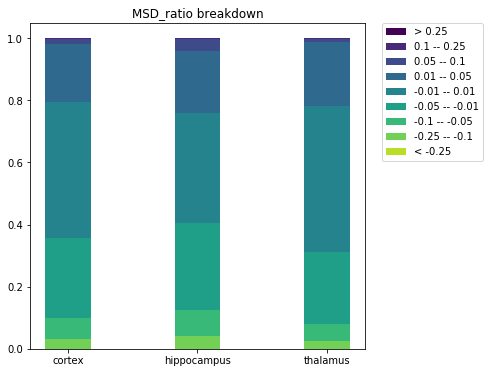

In [51]:
vids = 15
prefix = 'P3_S1_R'
bins = [-1000, -.25, -.1, -0.05, -0.01, 0.01, .05, .1, .25, 1000]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'MSD_ratio'

data = plot_ft_distribution(prefix, bins, labels, feature)

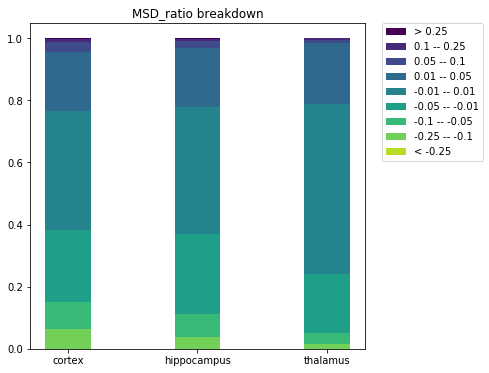

In [30]:
vids = 15
prefix = 'P3_S1_L'
bins = [-1000, -.25, -.1, -0.05, -0.01, 0.01, .05, .1, .25, 1000]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'MSD_ratio'

data = plot_ft_distribution(prefix, bins, labels, feature)

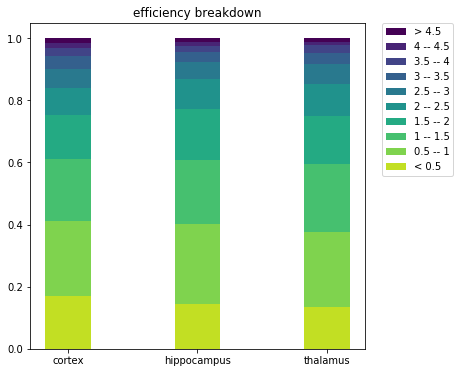

In [58]:
prefix = 'P3_S2_R'
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 100]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'efficiency'

data = plot_ft_distribution(prefix, bins, labels, feature)

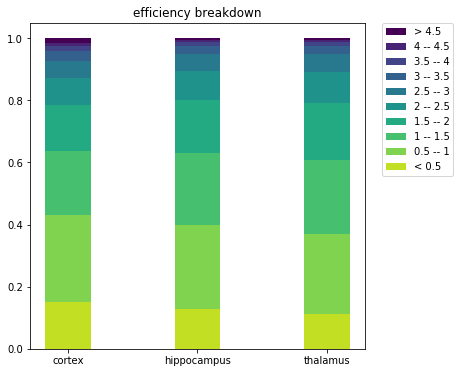

In [59]:
prefix = 'P3_S2_L'
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 100]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'efficiency'

data = plot_ft_distribution(prefix, bins, labels, feature)

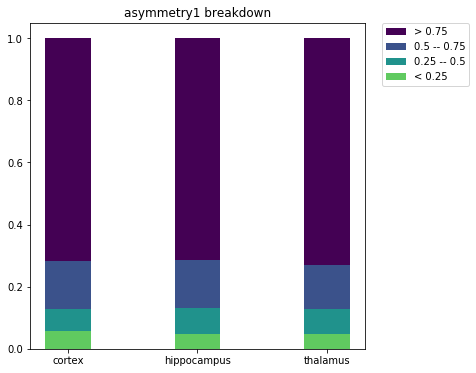

In [56]:
prefix = 'P3_S2_R'
bins = [0, 0.25, 0.5, 0.75, 1]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'asymmetry1'

data = plot_ft_distribution(prefix, bins, labels, feature)

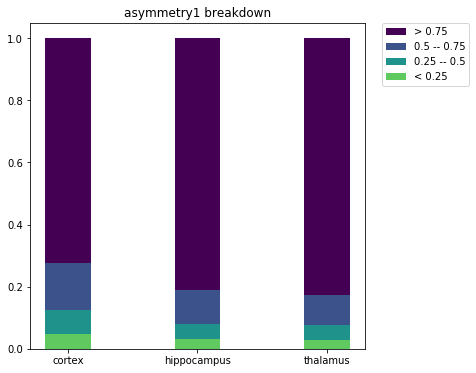

In [57]:
prefix = 'P3_S2_L'
bins = [0, 0.25, 0.5, 0.75, 1]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'asymmetry1'

data = plot_ft_distribution(prefix, bins, labels, feature)

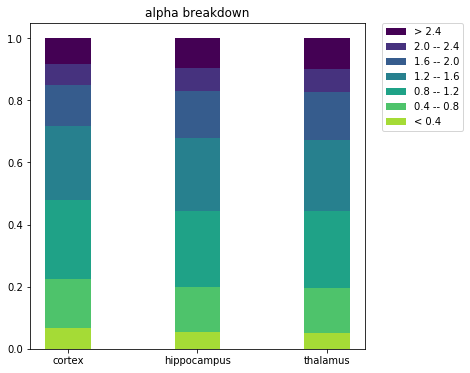

In [54]:
prefix = 'P3_S2_R'
bins = [0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 1000]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'alpha'

data = plot_ft_distribution(prefix, bins, labels, feature)

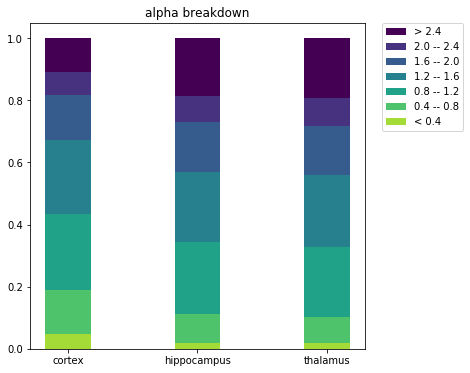

In [55]:
prefix = 'P3_S2_L'
bins = [0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 1000]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'alpha'

data = plot_ft_distribution(prefix, bins, labels, feature)

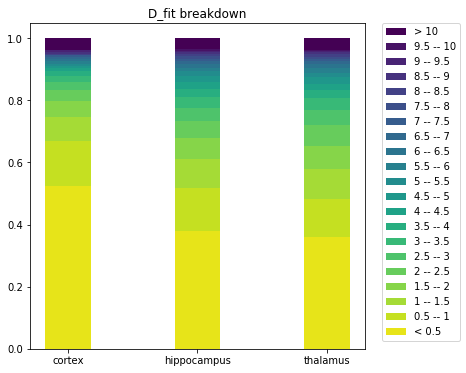

In [60]:
prefix = 'P3_S2_R'
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10000]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'D_fit'

data = plot_ft_distribution(prefix, bins, labels, feature)

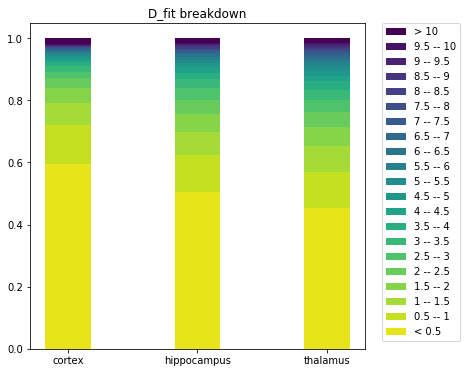

In [61]:
prefix = 'P3_S2_L'
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10000]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'D_fit'

data = plot_ft_distribution(prefix, bins, labels, feature)

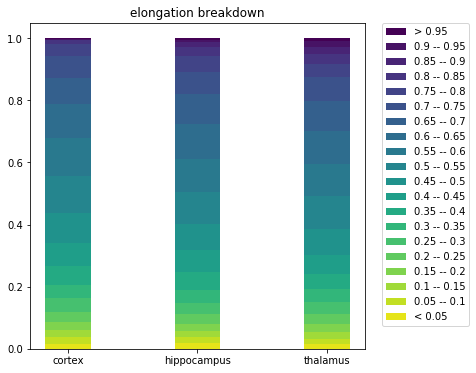

In [62]:
prefix = 'P3_S2_R'
bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1000]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'elongation'

data = plot_ft_distribution(prefix, bins, labels, feature)

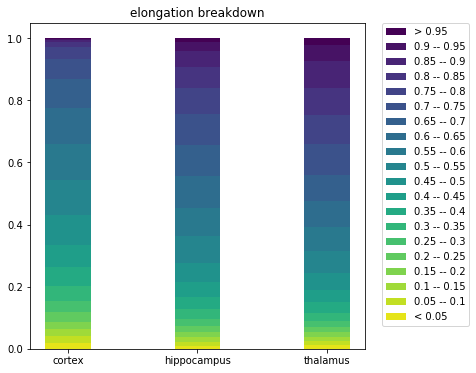

In [63]:
prefix = 'P3_S2_L'
bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1000]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'elongation'

data = plot_ft_distribution(prefix, bins, labels, feature)

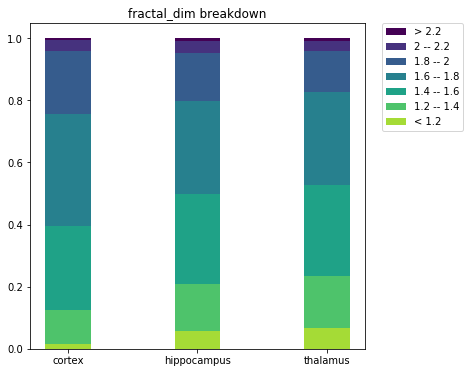

In [71]:
prefix = 'P3_S2_R'
bins = [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 10000]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'fractal_dim'

data = plot_ft_distribution(prefix, bins, labels, feature)

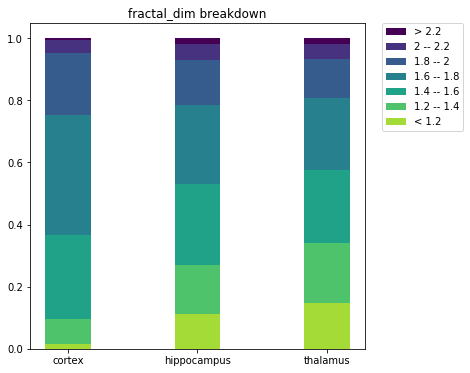

In [72]:
prefix = 'P3_S2_L'
bins = [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 10000]
labels = ['cortex', 'hippocampus', 'thalamus']
feature = 'fractal_dim'

data = plot_ft_distribution(prefix, bins, labels, feature)

In [16]:
features = pd.read_csv("features_{}_0000.csv".format(prefix))

In [17]:
features

,Unnamed: 0,AR,D_fit,MSD_ratio,Track_ID,X,Y,alpha,asymmetry1,asymmetry2,asymmetry3,boundedness,efficiency,elongation,fractal_dim,frames,kurtosis,straightness,trappedness
0,0,4.843216,0.017095,-0.003607,0.0,109.825540,1685.955701,1.988511,0.998416,0.019909,0.619378,0.000474,8.613752,0.793526,1.427955,487.0,2.240154,0.151889,-0.227134
1,1,3.488764,0.134011,-0.001871,1.0,370.709952,1790.691112,1.434573,0.993296,0.041009,0.552198,0.000919,2.621121,0.713366,1.627439,651.0,2.368872,0.072523,-0.226996
2,2,1.892945,1.820750,0.019851,2.0,269.304877,1554.225506,0.679904,0.771275,0.254630,0.194161,0.015841,0.683550,0.471723,1.717935,72.0,2.479656,0.110128,-0.222406
3,3,1.885875,0.015653,0.004799,3.0,266.103032,1901.662800,1.454997,0.762498,0.260164,0.189153,0.002115,0.384158,0.469742,1.813517,651.0,3.829716,0.027630,-0.226628
4,4,1.406256,0.729116,-0.000671,4.0,439.967752,1620.262535,1.023416,0.681250,0.309295,0.149834,0.010748,0.884269,0.288892,1.806886,141.0,1.855031,0.091362,-0.223971
5,5,2.384414,0.049828,-0.003278,5.0,63.756549,1661.150485,1.619858,0.959893,0.101158,0.405188,0.001691,2.042836,0.580610,1.568110,321.0,1.901472,0.090900,-0.226758
6,6,1.287327,0.005807,0.001053,6.0,105.437066,1781.199297,1.733170,0.617607,0.346260,0.125452,0.002353,0.787407,0.223197,1.823473,651.0,2.826937,0.040092,-0.226554
7,7,1.730340,0.161316,-0.002894,7.0,33.122491,1547.835009,1.371664,0.856065,0.197060,0.254840,0.009022,1.189153,0.422079,1.670473,111.0,2.148083,0.119709,-0.224502
8,8,1.588645,0.624050,0.004760,8.0,318.189685,1727.710553,0.841293,0.336835,0.515289,0.052517,0.003318,0.370700,0.370533,1.945254,651.0,2.177554,0.026939,-0.226257
9,9,2.307226,0.525533,-0.006494,9.0,164.347290,1967.292684,1.237714,0.967186,0.091329,0.425619,0.005653,1.961421,0.566579,1.584450,135.0,1.552454,0.139738,-0.225538
